In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def read_mumax3_ovffiles(outputdir):
    """Load all ovffiles in outputdir into a dictionary of numpy arrays 
    with the ovffilename (without extension) as key"""
    
    from subprocess import run, PIPE, STDOUT
    from glob import glob
    from os import path
    from numpy import load

    # convert all ovf files in the output directory to numpy files
    p = run(["mumax3-convert","-numpy",outputdir+"/*.ovf"], stdout=PIPE, stderr=STDOUT)
    if p.returncode != 0:
        print(p.stdout.decode('UTF-8'))

    # read the numpy files (the converted ovf files)
    fields = {}
    for npyfile in glob(outputdir+"/*.npy"):
        key = path.splitext(path.basename(npyfile))[0]
        fields[key] = load(npyfile)
    
    return fields

# Single .ovf mumax file processor

In [4]:
#from scipy import signal
#from sewar.full_ref import mse, rmse, psnr, uqi, ssim, ergas, scc, rase, sam, msssim, vifp
#from pytorch_msssim import ssim, ms_ssim, SSIM, MS_SSIM
from skimage import io, color, measure
import os
from os import listdir
from os.path import isfile, join, realpath
import re
import csv

outputdir = 'D:/Projects/mumax3.9.1_windows/crbr3_bubble4.out' #D:\Projects\mumax3.9.1_windows
fields = read_mumax3_ovffiles(outputdir)
print(fields.keys())
os.chdir(outputdir)
mypath=os.getcwd()

#m = fields["m"]
mfm20 = fields["MFM_lift_20nm"]
mfm30 = fields["MFM_lift_30nm"]
mfm50 = fields["MFM_lift_50nm"]
mfm70 = fields["MFM_lift_70nm"]
mfm80 = fields["MFM_lift_80nm"]

mfmz = mfm20[0,0]
plt.figure()
plt.imshow(mfmz, cmap="gray")
plt.show()

mfmz = mfm30[0,0]
plt.figure()
plt.imshow(mfmz, cmap="gray")
plt.show()

mfmz = mfm50[0,0]
plt.figure()
plt.imshow(mfmz, cmap="gray")
plt.show()

mfmz = mfm70[0,0]
plt.figure()
plt.imshow(mfmz, cmap="gray")
plt.show()

mfmz = mfm80[0,0]
plt.figure()
plt.imshow(mfmz, cmap="gray")
plt.show()

#ssim_value = measure.compare_ssim(mz1, mz2)
#print(ssim_value)

dict_keys(['bubble', 'm'])


KeyError: 'MFM_lift_20nm'

# multiple m.ovf processor

In [78]:
from skimage import io, color, measure
import os
from os import listdir
from os.path import isfile, join, realpath
import re
import csv

os.chdir('D:/Projects/mumax3.9.1_windows/analysis/')
mypath=os.getcwd()

outputdir = mypath
fields = read_mumax3_ovffiles(outputdir)
data_list =[]

files = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.split(".")[-1] != "png" and f.split(".")[-1] != "ovf" and f.split(".")[-1] != "csv"]
for file in files:
    m = fields[os.path.splitext(file)[0]]
    mz1 = m[2,0,:,:]
    plt.figure()
    plt.imshow(mz1, cmap="gray")
    plt.axis('off')
    fig = plt.imshow(mz1, cmap="gray")
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    title1 = os.path.splitext(file)[0] + '_1' + '.png'
    plt.savefig(os.path.join(mypath, title1), bbox_inches='tight', pad_inches=0)
    #plt.show()
    plt.close()
    
    mz2 = m[2,24,:,:]
    plt.figure()
    plt.imshow(mz2, cmap="gray")
    plt.axis('off')
    fig = plt.imshow(mz2, cmap="gray")
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    title2 = os.path.splitext(file)[0] + '_2' + '.png'
    plt.savefig(os.path.join(mypath, title2), bbox_inches='tight', pad_inches=0)
    #plt.show()
    plt.close()
    
    ssim_value = measure.compare_ssim(mz1, mz2)
    #print(os.path.splitext(file)[0])
    #print(ssim_value)
    
    row = [os.path.splitext(file)[0], ssim_value]
    data_list.append(row)

#print(data_list)
output_file = "data.csv"

# Write the data list to the CSV file
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for row in data_list:
        writer.writerow(row)

In [5]:
import csv
output_file = "data.csv"

# Write the data list to the CSV file
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for row in data_list:
        writer.writerow(row)

# MFM.ovf processor

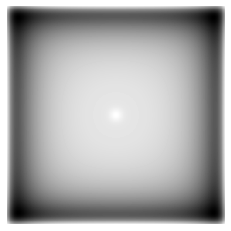

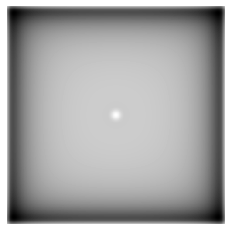

In [6]:
import os
from os import listdir
from os.path import isfile, join, realpath
import re
import csv

os.chdir('D:/Projects/mumax3.9.1_windows/crbr3_bubble7-in-v2.out/mfm')
mypath=os.getcwd()

outputdir = mypath
fields = read_mumax3_ovffiles(outputdir)
data_list =[]

files = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.split(".")[-1] != "png" and f.split(".")[-1] != "ovf"]
for file in files:
    mfm_data = fields[os.path.splitext(file)[0]]
    mfm = mfm_data[0,10]
    plt.figure()
    plt.axis('off')
    fig = plt.imshow(mfm, cmap="gray")
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    title = os.path.splitext(file)[0] + '.png'
    plt.savefig(os.path.join(mypath, title), bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()

## converting from png to ovf

In [17]:
import numpy as np


os.chdir('D:/Projects/mumax3.9.1_windows/init_magn_mfm')
mypath=os.getcwd()

# Load a PNG image using a library like PIL (Pillow)
from PIL import Image
img = Image.open("mfm_mz.png")
img_data = np.array(img)

# Assuming 'img_data' represents the magnetization configuration from the image
# You may need to scale and convert the image data as per your simulation requirements

# Create an OVF file with the magnetization data
ovf_header = """# OOMMF OVF 2.0
Segment
# Segment count: 1
# Begin: Segment
# Begin: Header
# Title: m
# meshtype: rectangular
# meshunit: m
# xmin: 0
# ymin: 0
# zmin: 0
# xmax: 4.0000000000000003e-07
# ymax: 4.0000000000000003e-07
# zmax: 5.0000000000000004e-08
# valuedim: 3
# valuelabels: m_x m_y m_z
# valueunits: 1 1 1
# Desc: Total simulation time:  5.000000000000001e-09  s
# xbase: 1e-09
# ybase: 1e-09
# zbase: 1e-09
# xnodes: 200
# ynodes: 200
# znodes: 25
# xstepsize: 2e-09
# ystepsize: 2e-09
# zstepsize: 2e-09
# End: Header
# Begin: Data Binary 4
"""

# Create a constant magnetization vector along the z-axis for all layers
magnetization = np.zeros((img_data.shape[0], img_data.shape[1], 3))
magnetization[:, :, 2] = 1.0  # Set the z-component to 1, representing magnetization along the z-axis

# Create an OVF file with the magnetization data
ovf_filename = "output.ovf"
with open(ovf_filename, "wb") as ovf_file:
    ovf_file.write(ovf_header.encode("utf-8"))
    ovf_file.write(magnetization.tobytes())
    
print(f"Conversion complete. OVF file saved as {ovf_filename}")

Conversion complete. OVF file saved as output.ovf


# ssim for .png images

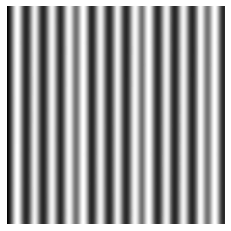

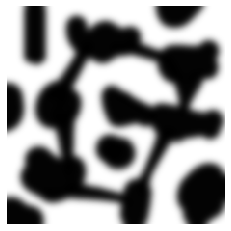

SSIM: 0.08529631412656932
SSIMnorm: 0.018844370851418966


In [81]:
from skimage import io, color, measure
#from skimage.metrics import structural_similarity as compare_ssim
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 


def calculate_ssim(image_path_1, image_path_2):
    # Load the images
    img1 = Image.open(image_path_1).convert('L')  # Convert to grayscale
    img2 = Image.open(image_path_2).convert('L')  # Convert to grayscale

    # Convert images to numpy arrays
    img1 = np.array(img1)
    img2 = np.array(img2)

    # Ensure the images are the same size
    if img1.shape != img2.shape:
        raise ValueError("Input images must have the same dimensions.")

    # Compute SSIM
    ssim = measure.compare_ssim(img1, img2)

    return ssim

# Example usage
mypath = 'C:/Users/serge/Downloads/gwy_saved_files/'
image_path_1 = 'C:/Users/serge/Downloads/gwy_saved_files/Untitled-3-11.png'
image_path_2 = 'C:/Users/serge/Downloads/gwy_saved_files/Untitled-3-22.png'
ssim_value = calculate_ssim(image_path_1, image_path_2)

img1 = Image.open(image_path_1).convert('L')  # Convert to grayscale
img2 = Image.open(image_path_2).convert('L') 

#ssim_value2 = calculate_ssim(img1, img2)

img1 = np.array(img1)
img2 = np.array(img2)

img1norm = img1/np.sum(img1)
img2norm = img2/np.sum(img2)

plt.figure()
plt.imshow(img1norm, cmap="gray")
plt.axis('off')
fig = plt.imshow(img1norm, cmap="gray")
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig(os.path.join(mypath, 'image1'), bbox_inches='tight', pad_inches=0)
plt.show()

plt.figure()
plt.imshow(img2norm, cmap="gray")
plt.axis('off')
fig = plt.imshow(img2norm, cmap="gray")
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig(os.path.join(mypath, 'image2'), bbox_inches='tight', pad_inches=0)
plt.show()

image_path_1n = 'C:/Users/serge/Downloads/gwy_saved_files/image1.png'
image_path_2n = 'C:/Users/serge/Downloads/gwy_saved_files/image2.png'

ssim_value_n = calculate_ssim(image_path_1n, image_path_2n)

print(f"SSIM: {ssim_value}")
print(f"SSIMnorm: {ssim_value_n}")

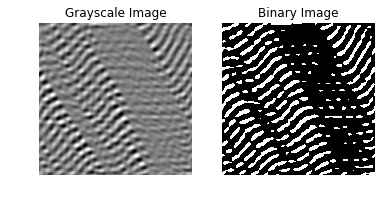

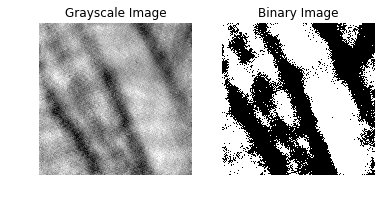

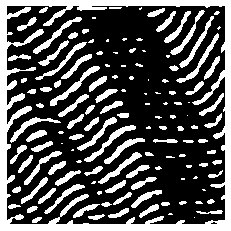

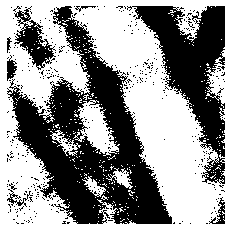

SSIM: 0.22420462936530774
SSIMbinary: 0.008708469646166209


In [50]:
from skimage import io, color, measure
#from skimage.metrics import structural_similarity as compare_ssim
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import cv2 


def calculate_ssim(image_path_1, image_path_2):
    # Load the images
    img1 = Image.open(image_path_1).convert('L')  # Convert to grayscale
    img2 = Image.open(image_path_2).convert('L')  # Convert to grayscale

    # Convert images to numpy arrays
    img1 = np.array(img1)
    img2 = np.array(img2)

    # Ensure the images are the same size
    if img1.shape != img2.shape:
        raise ValueError("Input images must have the same dimensions.")

    # Compute SSIM
    ssim = measure.compare_ssim(img1, img2)

    return ssim

# Example usage
mypath = 'C:/Users/serge/Downloads/gwy_saved_files/'
image_path_1 = 'C:/Users/serge/Downloads/gwy_saved_files/FFT_ssim/SC_119-Phase_green_lift_50nm_1_5kG_1_65K-fwd-FFT-1.png'
image_path_2 = 'C:/Users/serge/Downloads/gwy_saved_files/FFT_ssim/SC_119-Phase_green_lift_50nm_1_5kG_1_65K-fwd-FFT-2.png'
ssim_value = calculate_ssim(image_path_1, image_path_2)

img1 = Image.open(image_path_1).convert('L')  # Convert to grayscale
img2 = Image.open(image_path_2).convert('L') 

# read the image file 
image1 = cv2.imread(image_path_1)
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
ret,thresh1 = cv2.threshold(gray1,150,255,0)
imgRGB = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

image2 = cv2.imread(image_path_2)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
ret,thresh2 = cv2.threshold(gray2,150,255,0)

plt.subplot(121),plt.imshow(gray1,cmap = 'gray'),plt.title('Grayscale Image'),plt.axis('off')
plt.subplot(122),plt.imshow(thresh1,cmap = 'gray'),plt.title('Binary Image'),plt.axis('off')
plt.show()

plt.subplot(121),plt.imshow(gray2,cmap = 'gray'),plt.title('Grayscale Image'),plt.axis('off')
plt.subplot(122),plt.imshow(thresh2,cmap = 'gray'),plt.title('Binary Image'),plt.axis('off')
plt.show()

#img1 = np.array(img1)
#img2 = np.array(img2)

plt.figure()
plt.imshow(thresh1, cmap="gray")
plt.axis('off')
fig = plt.imshow(thresh1, cmap="gray")
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig(os.path.join(mypath, 'image1'), bbox_inches='tight', pad_inches=0)
plt.show()

plt.figure()
plt.imshow(thresh2, cmap="gray")
plt.axis('off')
fig = plt.imshow(thresh2, cmap="gray")
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig(os.path.join(mypath, 'image2'), bbox_inches='tight', pad_inches=0)
plt.show()

image_path_1n = 'C:/Users/serge/Downloads/gwy_saved_files/image1.png'
image_path_2n = 'C:/Users/serge/Downloads/gwy_saved_files/image2.png'

ssim_value_n = calculate_ssim(image_path_1n, image_path_2n)

print(f"SSIM: {ssim_value}")
print(f"SSIMbinary: {ssim_value_n}")

In [30]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


# 3D vector arrow plot (from .ovf files)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def read_mumax3_ovffiles(outputdir):
    """Load all ovffiles in outputdir into a dictionary of numpy arrays 
    with the ovffilename (without extension) as key"""
    
    from subprocess import run, PIPE, STDOUT
    from glob import glob
    from os import path
    from numpy import load

    # convert all ovf files in the output directory to numpy files
    p = run(["mumax3-convert","-numpy",outputdir+"/*.ovf"], stdout=PIPE, stderr=STDOUT)
    if p.returncode != 0:
        print(p.stdout.decode('UTF-8'))

    # read the numpy files (the converted ovf files)
    fields = {}
    for npyfile in glob(outputdir+"/*.npy"):
        key = path.splitext(path.basename(npyfile))[0]
        fields[key] = load(npyfile)
    
    return fields

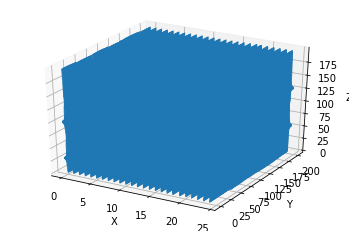

In [12]:
#from scipy import signal
#from sewar.full_ref import mse, rmse, psnr, uqi, ssim, ergas, scc, rase, sam, msssim, vifp
#from pytorch_msssim import ssim, ms_ssim, SSIM, MS_SSIM
from skimage import io, color, measure
import os
from os import listdir
from os.path import isfile, join, realpath
import re
import csv

outputdir = 'D:/Projects/mumax3.9.1_windows/analysis/' #D:\Projects\mumax3.9.1_windows
fields = read_mumax3_ovffiles(outputdir)
print(fields.keys())
os.chdir(outputdir)
mypath=os.getcwd()

outputdir = mypath
fields = read_mumax3_ovffiles(outputdir)
data_list =[]

files = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.split(".")[-1] != "png" and f.split(".")[-1] != "ovf" and f.split(".")[-1] != "csv"]
for file in files:
    m = fields[os.path.splitext(file)[0]]
    print(m.shape)
    mz1 = m[2,0,:,:]
    plt.figure()
    plt.imshow(mz1, cmap="gray")
    plt.axis('off')
    fig = plt.imshow(mz1, cmap="gray")
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    title1 = os.path.splitext(file)[0] + '_1' + '.png'
    plt.savefig(os.path.join(mypath, title1), bbox_inches='tight', pad_inches=0)
    #plt.show()
    plt.close()

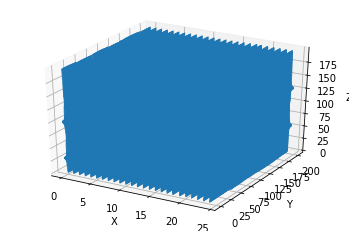

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data from the numpy file (assuming the shape is [3, nx, ny, nz])
data = np.load('m000000.npy')

# Extract the shape of the grid
_, nx, ny, nz = data.shape

# Create a 3D grid for the space dimensions
x, y, z = np.meshgrid(np.arange(nx), np.arange(ny), np.arange(nz), indexing='ij')

# Extract the vector components (U, V, W) for the X, Y, Z directions
U = data[0, :, :, :]  # X components of the vectors
V = data[1, :, :, :]  # Y components of the vectors
W = data[2, :, :, :]  # Z components of the vectors

# Flatten the grids and vector components for quiver
x_flat = x.flatten()
y_flat = y.flatten()
z_flat = z.flatten()
u_flat = U.flatten()
v_flat = V.flatten()
w_flat = W.flatten()

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the vectors using quiver
ax.quiver(x_flat, y_flat, z_flat, u_flat, v_flat, w_flat, length=0.5, normalize=True)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

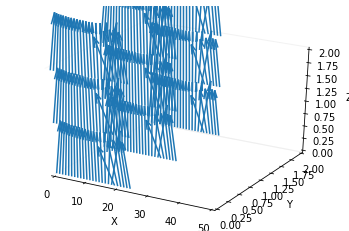

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data from the numpy file (assuming the shape is [3, nx, ny, nz])
data = np.load('m000000.npy')

# Extract the shape of the grid
_, nx, ny, nz = data.shape

# Create a 3D grid for the space dimensions
x, y, z = np.meshgrid(np.arange(nx), np.arange(ny), np.arange(nz), indexing='ij')

# Extract the vector components (U, V, W) for the X, Y, Z directions
U = data[0, :, :, :]  # X components of the vectors
V = data[1, :, :, :]  # Y components of the vectors
W = data[2, :, :, :]  # Z components of the vectors

# Define the range of x, y, z to plot (e.g., x in [5, 10], y in [5, 10], z in [3, 8])
x_min, x_max = 0, 50
y_min, y_max = 0, 2
z_min, z_max = 0, 2

# Create a mask to filter points in the specified range
mask = (x >= x_min) & (x <= x_max) & (y >= y_min) & (y <= y_max) & (z >= z_min) & (z <= z_max)

# Apply the mask to the grid points and vector components
x_filtered = x[mask]
y_filtered = y[mask]
z_filtered = z[mask]
u_filtered = U[mask]
v_filtered = V[mask]
w_filtered = W[mask]

# Control density: Sub-sample the grid points and vector components
density_step = 1  # Adjust this step value to control density, higher values reduce arrow density

x_subsampled = x_filtered[::density_step]
y_subsampled = y_filtered[::density_step]
z_subsampled = z_filtered[::density_step]
u_subsampled = u_filtered[::density_step]
v_subsampled = v_filtered[::density_step]
w_subsampled = w_filtered[::density_step]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Increase the size of the arrows by adjusting 'length' and 'arrow_length_ratio'
ax.quiver(x_subsampled, y_subsampled, z_subsampled, u_subsampled, v_subsampled, w_subsampled, 
          length=1.0,             # Length of arrows
          arrow_length_ratio=0.2,  # Arrowhead size
          normalize=False)         # False keeps vector magnitudes

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Hide the grid
ax.grid(False)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Set axis limits (optional) to reflect the range
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_zlim([z_min, z_max])

# Show the plot
plt.show()

In [76]:
import os
from os import listdir
from os.path import isfile, join, realpath
import re
import csv

os.chdir('D:/Projects/mumax3.9.1_windows/analysis/')
mypath=os.getcwd()

outputdir = mypath
fields = read_mumax3_ovffiles(outputdir)
data_list =[]

files = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.split(".")[-1] != "png" and f.split(".")[-1] != "ovf" and f.split(".")[-1] != "csv"]
for file in files:
    m = fields[os.path.splitext(file)[0]]
    mz1 = m[2,0,:,:]
    plt.figure()
    plt.imshow(mz1, cmap="gray")
    plt.axis('off')
    fig = plt.imshow(mz1, cmap="gray")
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    title1 = os.path.splitext(file)[0] + '_1' + '.png'
    plt.savefig(os.path.join(mypath, title1), bbox_inches='tight', pad_inches=0)
    #plt.show()
    plt.close()
    
    mz2 = m[2,:,150,:]
    plt.figure()
    plt.imshow(mz2, cmap="gray")
    plt.axis('off')
    fig = plt.imshow(mz2, cmap="gray")
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    title2 = os.path.splitext(file)[0] + '_2' + '.png'
    plt.savefig(os.path.join(mypath, title2), bbox_inches='tight', pad_inches=0)
    #plt.show()
    plt.close()